# **1. BUSINESS UNDERSTANDING**

**Title** : Analisis Harga Komoditas Pangan di Provinsi DKI Jakarta Selama Pandemi COVID-19.

**Background** :
Prices are formed due to the interaction of supply and demand (Rasyidi, 2017). Every day, food commodity prices increase and decrease, depending on supply and demand, according to (Saliem, Agustian, & Perdana, 2020) since the beginning of the pandemic from March 2020 until now, there has been no significant effect on food supply. Constraints are precisely in the supply chain due to restrictions on activities or labor issues. If this obstacle occurs in the long term, it will certainly have an impact on the disruption of the supply of food commodities and in the end, have an impact on the level of food prices.

**Goals** :
* Knowing whether food commodity prices are affected during Covid-19 pandemic.
* Knowing the clusters of food commodities that have high prices in DKI Jakarta.

**Advantages** :
* Provide insight into the impact of the Covid-19 pandemic on food commodity prices.
* Provide solutions for the DKI Jakarta provincial government in realizing food commodity price stability.

# **2. DATA UNDERSTANDING**

**Data Source** :

PUSAT INFORMASI HARGA PANGAN STRATEGIS NASIONAL

URL : https://hargapangan.id/tabel-harga/pedagang-besar/daerah


**Description** :
* Food Price Growth
* Period : 01 Jan 2019 - 31 Dec 2020
* Province : DKI Jakarta
* Regency/City : Central Jakarta
* Market : Pasar Jaya Regional Company
* Report Type : Daily Report
* Data Size : 21 rows × 492 columns
* Commodity Category : Rice, Chicken, Beef, Chicken Eggs, Shallots, Garlic, Red Chili, Cayenne Pepper, Cooking Oil, Granulated Sugar


# **3. IMPLEMENTATION**

## **3.1 Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ipywidgets import interact
import ipywidgets as widgets
import datetime as dt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
pd.options.mode.chained_assignment = None
from matplotlib import dates as mdates

from sklearn.cluster import KMeans

## **3.2 Load Dataset**

In [ ]:
df=pd.read_excel('https://github.com/multimediary/dataset/blob/master/Dataset%20Harga%20Komoditas%20Pangan%20DKI%20Jakarta%20Tahun%202019-2020.xlsx?raw=true')
df

,Komoditas(Rp),03/01/2019,04/01/2019,07/01/2019,08/01/2019,09/01/2019,10/01/2019,11/01/2019,14/01/2019,15/01/2019,16/01/2019,17/01/2019,18/01/2019,21/01/2019,22/01/2019,23/01/2019,24/01/2019,25/01/2019,28/01/2019,29/01/2019,30/01/2019,31/01/2019,01/02/2019,04/02/2019,06/02/2019,07/02/2019,08/02/2019,11/02/2019,12/02/2019,13/02/2019,14/02/2019,15/02/2019,18/02/2019,19/02/2019,20/02/2019,21/02/2019,22/02/2019,25/02/2019,26/02/2019,27/02/2019,...,02/11/2020,03/11/2020,04/11/2020,05/11/2020,06/11/2020,09/11/2020,10/11/2020,11/11/2020,12/11/2020,13/11/2020,16/11/2020,17/11/2020,18/11/2020,19/11/2020,20/11/2020,23/11/2020,24/11/2020,25/11/2020,26/11/2020,27/11/2020,30/11/2020,01/12/2020,02/12/2020,03/12/2020,04/12/2020,07/12/2020,08/12/2020,10/12/2020,11/12/2020,14/12/2020,15/12/2020,16/12/2020,17/12/2020,18/12/2020,21/12/2020,22/12/2020,23/12/2020,28/12/2020,29/12/2020,30/12/2020
0,Beras Kualitas Bawah I (kg),9100,9100,9100,9100,9100,9850,9850,9850,9850,9850,9850,9850,9850,9850,9850,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,10200,9550,9550,9550,9550,9550,...,8600,8600,8600,8600,8600,8600,8600,8600,8600,8600,8600,8600,8600,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8600,8600,8600,8600,8600,8600,8600,8300
1,Beras Kualitas Bawah II (kg),8450,8450,8450,8450,8450,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9950,9250,9250,9250,9250,9250,...,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050,8150,8150,8150,8150,8150,8150,8150,8050
2,Beras Kualitas Medium I (kg),10600,10600,10600,10600,10600,10750,10750,10750,10750,10750,10750,10750,10750,10750,10750,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11550,11100,11100,11100,11100,11100,...,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9350,9450,9450,9450,9450,9450,9450,9450,9450
3,Beras Kualitas Medium II (kg),9750,9750,9750,9750,9750,10050,10050,10050,10050,10050,10050,10050,10050,10050,10050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,11050,10500,10500,10500,10500,10500,...,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9150,9150,9150,9150,9150,9150,9150,9150
4,Beras Kualitas Super I (kg),12850,12850,12850,12850,12850,12950,12950,12950,12950,12950,12950,12950,12950,12950,12950,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,...,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13100,13100,13100,13100,13100,13100,13100,13100
5,Beras Kualitas Super II (kg),12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400,13300,13300,13300,13300,13300,...,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12650,12750,12750,12750,12750,12750,12750,12750,12750
6,Daging Ayam Ras Segar (kg),23500,23500,23500,23500,23500,22250,22250,22250,22250,22250,20750,20750,20750,20750,20750,22300,22300,22300,22300,22300,21650,21650,21650,21650,21100,21100,21100,21100,21100,21550,21550,21550,21550,21550,22250,22250,22250,22250,22250,...,27500,27500,2750

In [ ]:
df.corr().sum()

03/01/2019    471.328747
04/01/2019    471.328747
07/01/2019    471.328747
08/01/2019    471.328747
09/01/2019    471.328747
                 ...    
22/12/2020    458.243824
23/12/2020    458.243824
28/12/2020    458.243824
29/12/2020    458.243824
30/12/2020    454.446912
Length: 491, dtype: float64

## **3.3 Data Cleaning and Preparation**

### 3.3.1 Transpose Dataset

In [ ]:
df_copy=df.drop(df.columns[[0]], axis=1)
item = df_copy.columns
df_transpose = pd.DataFrame(columns=['Commodity','Price','Date'])
for item in df_copy:
    komo=df[['Komoditas(Rp)', item]]
    komo.rename(columns={item:'Price'}, inplace=True)
    komo['Date']=item
    komo.rename(columns={'Komoditas(Rp)':'Commodity'}, inplace=True)
    df_transpose=df_transpose.append(komo)

In [ ]:
df_transpose.head()

,Commodity,Price,Date
0,Beras Kualitas Bawah I (kg),9100,03/01/2019
1,Beras Kualitas Bawah II (kg),8450,03/01/2019
2,Beras Kualitas Medium I (kg),10600,03/01/2019
3,Beras Kualitas Medium II (kg),9750,03/01/2019
4,Beras Kualitas Super I (kg),12850,03/01/2019


In [ ]:
df_transpose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10311 entries, 0 to 20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Commodity  10311 non-null  object
 1   Price      10311 non-null  object
 2   Date       10311 non-null  object
dtypes: object(3)
memory usage: 322.2+ KB


In [ ]:
df_transpose.describe()

,Commodity,Price,Date
count,10311,10311,10311
unique,21,302,491
top,Cabai Rawit Hijau (kg),110000,16/09/2020
freq,491,371,21


### 3.3.2 Missing Values Detection

In [ ]:
df_transpose.isnull().values.any()

False

In [ ]:
df_transpose.isnull().sum()

Commodity    0
Price        0
Date         0
dtype: int64

In [ ]:
df_transpose['Commodity'].unique()

array(['Beras Kualitas Bawah I (kg)', 'Beras Kualitas Bawah II (kg)',
       'Beras Kualitas Medium I (kg)', 'Beras Kualitas Medium II (kg)',
       'Beras Kualitas Super I (kg)', 'Beras Kualitas Super II (kg)',
       'Daging Ayam Ras Segar (kg)', 'Daging Sapi Kualitas 1 (kg)',
       'Daging Sapi Kualitas 2 (kg)', 'Telur Ayam Ras Segar\n (kg)',
       'Bawang Merah Ukuran Sedang (kg)',
       'Bawang Putih Ukuran Sedang (kg)', 'Cabai Merah Besar (kg)',
       'Cabai Merah Keriting  (kg)', 'Cabai Rawit Hijau (kg)',
       'Cabai Rawit Merah (kg)', 'Minyak Goreng Curah (kg)',
       'Minyak Goreng Kemasan Bermerk 1 (kg)',
       'Minyak Goreng Kemasan Bermerk 2 (kg)',
       'Gula Pasir Kualitas Premium (kg)', 'Gula Pasir Lokal (kg)'],
      dtype=object)

In [ ]:
df_transpose['Commodity'].value_counts()

Cabai Rawit Hijau (kg)                  491
Beras Kualitas Medium II (kg)           491
Beras Kualitas Bawah II (kg)            491
Beras Kualitas Medium I (kg)            491
Minyak Goreng Curah (kg)                491
Daging Sapi Kualitas 2 (kg)             491
Telur Ayam Ras Segar\n (kg)             491
Bawang Merah Ukuran Sedang (kg)         491
Cabai Merah Besar (kg)                  491
Gula Pasir Kualitas Premium (kg)        491
Minyak Goreng Kemasan Bermerk 2 (kg)    491
Beras Kualitas Super I (kg)             491
Daging Ayam Ras Segar (kg)              491
Gula Pasir Lokal (kg)                   491
Minyak Goreng Kemasan Bermerk 1 (kg)    491
Cabai Merah Keriting  (kg)              491
Beras Kualitas Super II (kg)            491
Cabai Rawit Merah (kg)                  491
Daging Sapi Kualitas 1 (kg)             491
Beras Kualitas Bawah I (kg)             491
Bawang Putih Ukuran Sedang (kg)         491
Name: Commodity, dtype: int64

### 3.3.3 Data Formatting

In [ ]:
# Column "Price" From Object to Integer 
df_transpose['Price'] = df_transpose['Price'].astype('int64', copy=False)

In [ ]:
# Column "Date" From Object to Date Time
df_transpose['Date'] = pd.to_datetime(df_transpose['Date'], format='%d/%m/%Y')

In [ ]:
# Remove Unimportant String
df_transpose['Commodity'] = df_transpose['Commodity'].str.replace('kg','').str.replace('(','').str.replace(')','')
df_transpose['Commodity'] = df_transpose['Commodity'].str.strip()

In [ ]:
# Add Column "Month" and "Year"
df_transpose['Month'] = pd.DatetimeIndex(df_transpose['Date']).month
df_transpose['Year'] = pd.DatetimeIndex(df_transpose['Date']).year

In [ ]:
# Sorting Data
df_sort=df_transpose.sort_values(by=['Date','Commodity'])

In [ ]:
df_sort.head(21)

,Commodity,Price,Date,Month,Year
10,Bawang Merah Ukuran Sedang,23000,2019-01-03,1,2019
11,Bawang Putih Ukuran Sedang,20500,2019-01-03,1,2019
0,Beras Kualitas Bawah I,9100,2019-01-03,1,2019
1,Beras Kualitas Bawah II,8450,2019-01-03,1,2019
2,Beras Kualitas Medium I,10600,2019-01-03,1,2019
3,Beras Kualitas Medium II,9750,2019-01-03,1,2019
4,Beras Kualitas Super I,12850,2019-01-03,1,2019
5,Beras Kualitas Super II,12600,2019-01-03,1,2019
12,Cabai Merah Besar,30000,2019-01-03,1,2019
13,Cabai Merah Keriting,22500,2019-01-03,1,2019


In [ ]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10311 entries, 10 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  10311 non-null  object        
 1   Price      10311 non-null  int64         
 2   Date       10311 non-null  datetime64[ns]
 3   Month      10311 non-null  int64         
 4   Year       10311 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 483.3+ KB


In [ ]:
df_sort.describe()

,Price,Month,Year
count,10311.000000,10311.000000,10311.000000
mean,26566.070216,6.519348,2019.488798
std,28798.283728,3.452657,0.499899
min,7650.000000,1.000000,2019.000000
25%,10900.000000,3.000000,2019.000000
50%,13250.000000,7.000000,2019.000000
75%,25750.000000,10.000000,2020.000000
max,120000.000000,12.000000,2020.000000


In [ ]:
Commodity = df_sort['Commodity'].unique()
Commodity

array(['Bawang Merah Ukuran Sedang', 'Bawang Putih Ukuran Sedang',
       'Beras Kualitas Bawah I', 'Beras Kualitas Bawah II',
       'Beras Kualitas Medium I', 'Beras Kualitas Medium II',
       'Beras Kualitas Super I', 'Beras Kualitas Super II',
       'Cabai Merah Besar', 'Cabai Merah Keriting', 'Cabai Rawit Hijau',
       'Cabai Rawit Merah', 'Daging Ayam Ras Segar',
       'Daging Sapi Kualitas 1', 'Daging Sapi Kualitas 2',
       'Gula Pasir Kualitas Premium', 'Gula Pasir Lokal',
       'Minyak Goreng Curah', 'Minyak Goreng Kemasan Bermerk 1',
       'Minyak Goreng Kemasan Bermerk 2', 'Telur Ayam Ras Segar'],
      dtype=object)

### 3.3.4 Data Encoding 

In [ ]:
# Copy Dataset and Create Function Encoding
df_final = df_sort.copy()
enc = LabelEncoder()
def transforming(input, j):
    input.iloc[:,j] = enc.fit_transform(input.iloc[:,j])

# Encoding "Commodity" Column
for i in range(0,6):
    if(i==0):
        transforming(df_final, i)
df_final

,Commodity,Price,Date,Month,Year
10,0,23000,2019-01-03,1,2019
11,1,20500,2019-01-03,1,2019
0,2,9100,2019-01-03,1,2019
1,3,8450,2019-01-03,1,2019
2,4,10600,2019-01-03,1,2019
...,...,...,...,...,...
20,16,12250,2020-12-30,12,2020
16,17,12950,2020-12-30,12,2020
17,18,13000,2020-12-30,12,2020
18,19,13500,2020-12-30,12,2020


## **3.4 Exploratory Data Analysis**

### 1.   What Food Commodities experienced an average percentage increase in prices during the 2020 Covid-19 Pandemic?

In [ ]:
#Cari Mean Harga Masing-Masing Komoditas di Tahun 2019
eda_1_2019 = df_sort.loc[df_sort['Year'] == 2019]
eda_1_2019_mean = eda_1_2019[['Commodity','Price']].groupby('Commodity').mean()

#Cari Mean Harga Masing-Masing Komoditas di Tahun 2020
eda_1_2020 = df_sort.loc[df_sort['Year'] == 2020]
eda_1_2020_mean = eda_1_2020[['Commodity','Price']].groupby('Commodity').mean()

#Rename Kolom harga 2019
eda_1_2019_mean.rename(columns={'Price': 'Price_2019'}, inplace=True)

#Tambahkan kolom mean harga 2021
eda_1_2019_mean['Price_2021'] = eda_1_2020_mean['Price']

#Hitung berapa persen perbedaanya dan tambahkan kolomnya
eda_1_2019_mean['Percentage (%)'] = 100 - ((eda_1_2019_mean['Price_2019']/eda_1_2019_mean['Price_2021']) * 100)

#Cek Jika Mean Harga Tahun 2019 < 2020 maka tampilkan
eda_1_2019_mean['Compare'] = np.where(eda_1_2019_mean['Price_2019'] < eda_1_2019_mean['Price_2021'], 'True', 'False')
eda_1 = eda_1_2019_mean.loc[eda_1_2019_mean['Compare'] == 'True']
eda_1[['Percentage (%)']].reset_index()

,Commodity,Percentage (%)
0,Bawang Merah Ukuran Sedang,21.701059
1,Beras Kualitas Super I,1.736248
2,Beras Kualitas Super II,2.507707
3,Daging Ayam Ras Segar,22.497923
4,Daging Sapi Kualitas 2,0.790554
5,Gula Pasir Kualitas Premium,9.108514
6,Gula Pasir Lokal,10.794599
7,Minyak Goreng Curah,15.731243
8,Minyak Goreng Kemasan Bermerk 1,13.012995
9,Minyak Goreng Kemasan Bermerk 2,9.640964


### 2.   What Food Commodities experienced an average percentage decline in prices during the 2020 Covid-19 Pandemic?

In [ ]:
#Cek Jika Mean Harga Tahun 2019 > 2020 maka tampilkan
eda_1_2019_mean['Compare2'] = np.where(eda_1_2019_mean['Price_2019'] > eda_1_2019_mean['Price_2021'], 'True', 'False')
eda_2 = eda_1_2019_mean.loc[eda_1_2019_mean['Compare2'] == 'True']
eda_2[['Percentage (%)']].reset_index()

,Commodity,Percentage (%)
0,Bawang Putih Ukuran Sedang,-8.289562
1,Beras Kualitas Bawah I,-1.753536
2,Beras Kualitas Bawah II,-2.725937
3,Beras Kualitas Medium I,-0.740148
4,Beras Kualitas Medium II,-0.437180
5,Cabai Merah Besar,-0.088278
6,Cabai Merah Keriting,-9.138681
7,Cabai Rawit Hijau,-27.969953
8,Cabai Rawit Merah,-15.893266
9,Daging Sapi Kualitas 1,-1.119852


### 3.   What date did each Food Commodity have the highest price in 2019?

In [ ]:
#Cari Max Harga Masing-Masing Komoditas di Tahun 2019
eda_3_2019 = eda_1_2019.groupby(['Commodity'])['Price'].max().reset_index()
eda_3 = eda_1_2019[eda_1_2019.set_index(['Commodity','Price']).index.isin(eda_3_2019.set_index(['Commodity','Price']).index)]
eda_3.drop('Month', inplace=True, axis=1)
eda_3.drop('Year', inplace=True, axis=1)
#pd.set_option('display.max_rows', eda_3.shape[0]+1)
eda_3.sort_values(by=['Commodity','Date']).head(5)

,Commodity,Price,Date
10,Bawang Merah Ukuran Sedang,35000,2019-03-28
10,Bawang Merah Ukuran Sedang,35000,2019-03-29
10,Bawang Merah Ukuran Sedang,35000,2019-04-01
10,Bawang Merah Ukuran Sedang,35000,2019-04-02
10,Bawang Merah Ukuran Sedang,35000,2019-12-19


### 4.   What Date of each Food Commodity has the highest price in 2020?

In [ ]:
#Cari Max Harga Masing-Masing Komoditas di Tahun 2020
eda_4_2020 = eda_1_2020.groupby(['Commodity'])['Price'].max().reset_index()
eda_4 = eda_1_2020[eda_1_2020.set_index(['Commodity','Price']).index.isin(eda_4_2020.set_index(['Commodity','Price']).index)]
eda_4.drop('Month', inplace=True, axis=1)
eda_4.drop('Year', inplace=True, axis=1)
#pd.set_option('display.max_rows', eda_4.shape[0]+1)
eda_4.sort_values(by=['Commodity','Date']).head(5)

,Commodity,Price,Date
10,Bawang Merah Ukuran Sedang,51000,2020-05-28
10,Bawang Merah Ukuran Sedang,51000,2020-05-29
10,Bawang Merah Ukuran Sedang,51000,2020-06-02
10,Bawang Merah Ukuran Sedang,51000,2020-06-03
11,Bawang Putih Ukuran Sedang,55000,2020-02-06


### 5.   What date did each Food Commodity have the lowest price in 2019?

In [ ]:
#Cari Min Harga Masing-Masing Komoditas di Tahun 2019
eda_5_2019 = eda_1_2019.groupby(['Commodity'])['Price'].min().reset_index()
eda_5 = eda_1_2019[eda_1_2019.set_index(['Commodity','Price']).index.isin(eda_5_2019.set_index(['Commodity','Price']).index)]
eda_5.drop('Month', inplace=True, axis=1)
eda_5.drop('Year', inplace=True, axis=1)
#pd.set_option('display.max_rows', eda_3.shape[0]+1)
eda_5.sort_values(by=['Commodity','Date']).head(5)

,Commodity,Price,Date
10,Bawang Merah Ukuran Sedang,11500,2019-09-26
10,Bawang Merah Ukuran Sedang,11500,2019-09-27
10,Bawang Merah Ukuran Sedang,11500,2019-09-30
10,Bawang Merah Ukuran Sedang,11500,2019-10-01
10,Bawang Merah Ukuran Sedang,11500,2019-10-02


### 6.   What Date of each Food Commodity had the lowest price in 2020?

In [ ]:
#Cari Min Harga Masing-Masing Komoditas di Tahun 2020
eda_6_2020 = eda_1_2020.groupby(['Commodity'])['Price'].min().reset_index()
eda_6 = eda_1_2020[eda_1_2020.set_index(['Commodity','Price']).index.isin(eda_6_2020.set_index(['Commodity','Price']).index)]
eda_6.drop('Month', inplace=True, axis=1)
eda_6.drop('Year', inplace=True, axis=1)
#pd.set_option('display.max_rows', eda_4.shape[0]+1)
eda_6.sort_values(by=['Commodity','Date']).head(5)

,Commodity,Price,Date
10,Bawang Merah Ukuran Sedang,19000,2020-02-20
10,Bawang Merah Ukuran Sedang,19000,2020-02-21
10,Bawang Merah Ukuran Sedang,19000,2020-02-24
10,Bawang Merah Ukuran Sedang,19000,2020-02-25
10,Bawang Merah Ukuran Sedang,19000,2020-02-26


### 7.   What month in 2019 did each Food Commodity have the highest average price?

In [ ]:
#Cari Max dari Mean Harga per Bulan Masing-Masing Komoditas di Tahun 2019
eda_7_2019 = eda_1_2019.groupby(['Commodity', 'Month']).Price.agg(Price=('mean')).reset_index()
eda_7_max_2019 = eda_7_2019.groupby(['Commodity']).Price.agg(Price=('max')).reset_index()
eda_7 = pd.merge(left=eda_7_2019, right=eda_7_max_2019, left_on=['Commodity','Price'], right_on=['Commodity','Price'])
eda_7

,Commodity,Month,Price
0,Bawang Merah Ukuran Sedang,4,30700.000000
1,Bawang Putih Ukuran Sedang,4,44375.000000
2,Beras Kualitas Bawah I,2,9986.842105
3,Beras Kualitas Bawah II,2,9721.052632
4,Beras Kualitas Medium I,2,11392.105263
5,Beras Kualitas Medium II,2,10863.157895
6,Beras Kualitas Super I,2,13973.684211
7,Beras Kualitas Super II,2,13339.473684
8,Cabai Merah Besar,7,60217.391304
9,Cabai Merah Keriting,8,60568.181818


### 8.   What month in 2020 did each Food Commodity have the highest average price?

In [ ]:
#Cari Max dari Mean Harga per Bulan Masing-Masing Komoditas di Tahun 2020
eda_8_2020 = eda_1_2020.groupby(['Commodity', 'Month']).Price.agg(Price=('mean')).reset_index()
eda_8_max_2020 = eda_8_2020.groupby(['Commodity']).Price.agg(Price=('max')).reset_index()
eda_8 = pd.merge(left=eda_8_2020, right=eda_8_max_2020, left_on=['Commodity','Price'], right_on=['Commodity','Price'])
eda_8

,Commodity,Month,Price
0,Bawang Merah Ukuran Sedang,5,44178.571429
1,Bawang Putih Ukuran Sedang,2,46125.000000
2,Beras Kualitas Bawah I,1,9238.636364
3,Beras Kualitas Bawah II,3,9016.666667
4,Beras Kualitas Medium I,4,10828.571429
5,Beras Kualitas Medium II,4,10207.142857
6,Beras Kualitas Super I,4,13985.714286
7,Beras Kualitas Super II,4,13621.428571
8,Beras Kualitas Super II,5,13621.428571
9,Cabai Merah Besar,2,77250.000000


### 9.   What month in 2019 did each Food Commodity have the lowest average price?

In [ ]:
#Cari Min dari Mean Harga per Bulan Masing-Masing Komoditas di Tahun 2019
eda_9_2019 = eda_1_2019.groupby(['Commodity', 'Month']).Price.agg(Price=('mean')).reset_index()
eda_9_min_2019 = eda_9_2019.groupby(['Commodity']).Price.agg(Price=('min')).reset_index()
eda_9 = pd.merge(left=eda_9_2019, right=eda_9_min_2019, left_on=['Commodity','Price'], right_on=['Commodity','Price'])
eda_9

,Commodity,Month,Price
0,Bawang Merah Ukuran Sedang,9,12190.476190
1,Bawang Putih Ukuran Sedang,1,23119.047619
2,Beras Kualitas Bawah I,5,8164.285714
3,Beras Kualitas Bawah II,5,7800.000000
4,Beras Kualitas Bawah II,6,7800.000000
5,Beras Kualitas Medium I,6,9350.000000
6,Beras Kualitas Medium II,6,9000.000000
7,Beras Kualitas Super I,4,12370.000000
8,Beras Kualitas Super II,4,12040.000000
9,Cabai Merah Besar,3,19650.000000


### 10.   What month in 2020 does each Food Commodity have the lowest average price?

In [ ]:
#Cari Min dari Mean Harga per Bulan Masing-Masing Komoditas di Tahun 2020
eda_10_2020 = eda_1_2020.groupby(['Commodity', 'Month']).Price.agg(Price=('mean')).reset_index()
eda_10_min_2020 = eda_10_2020.groupby(['Commodity']).Price.agg(Price=('min')).reset_index()
eda_10 = pd.merge(left=eda_10_2020, right=eda_10_min_2020, left_on=['Commodity','Price'], right_on=['Commodity','Price'])
eda_10

,Commodity,Month,Price
0,Bawang Merah Ukuran Sedang,2,21200.000000
1,Bawang Putih Ukuran Sedang,7,18659.090909
2,Beras Kualitas Bawah I,7,8150.000000
3,Beras Kualitas Bawah II,7,7650.000000
4,Beras Kualitas Medium I,10,9350.000000
5,Beras Kualitas Medium I,11,9350.000000
6,Beras Kualitas Medium II,10,9050.000000
7,Beras Kualitas Medium II,11,9050.000000
8,Beras Kualitas Super I,8,13000.000000
9,Beras Kualitas Super I,9,13000.000000


### 11.   Is there a trend of price changes from time to time between 2019 and 2020?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


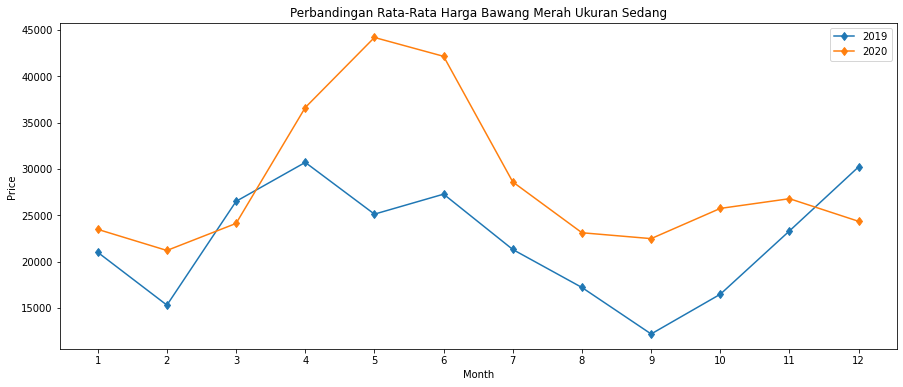

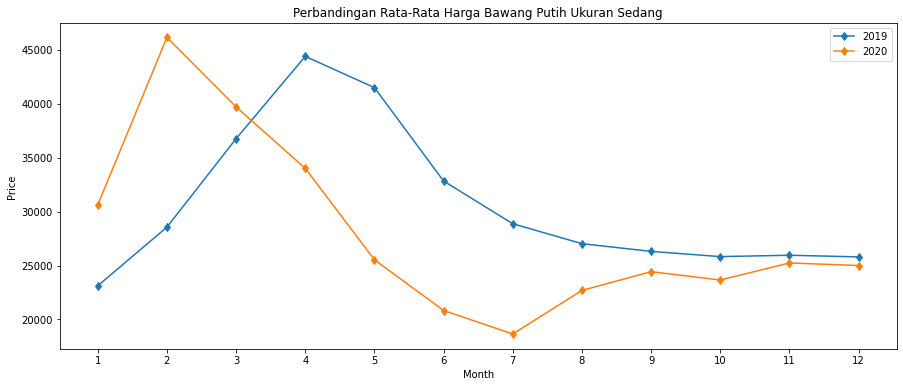

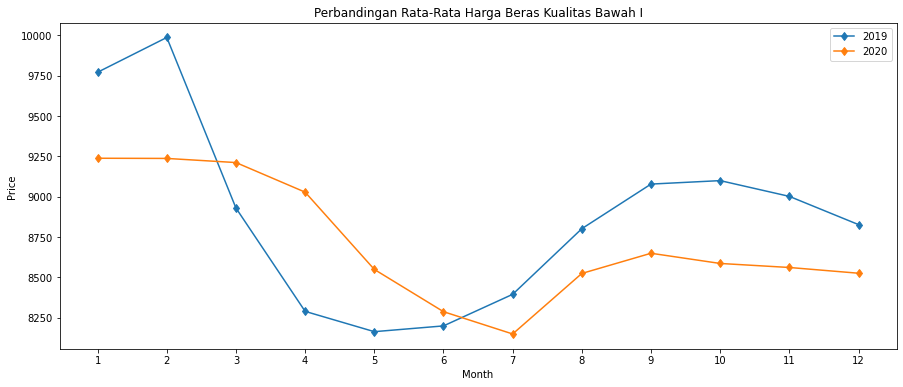

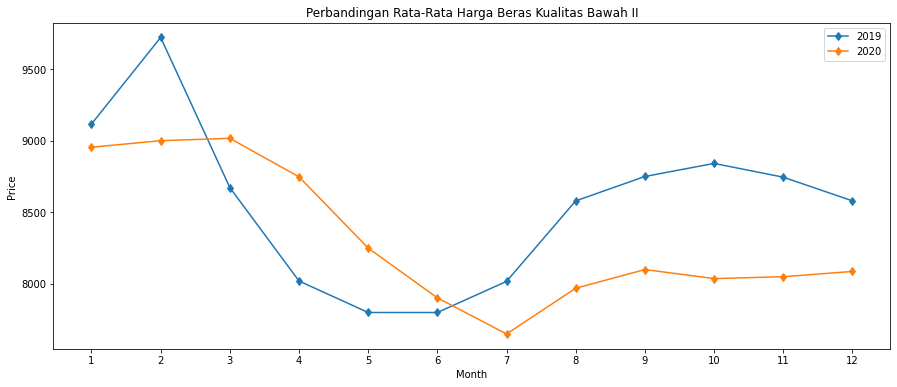

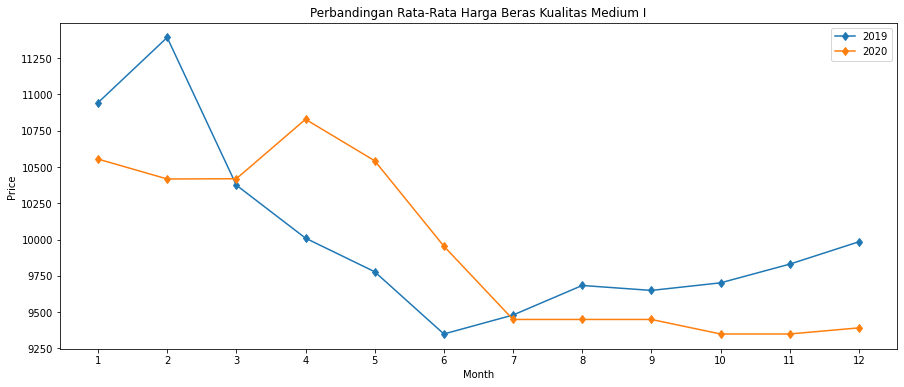

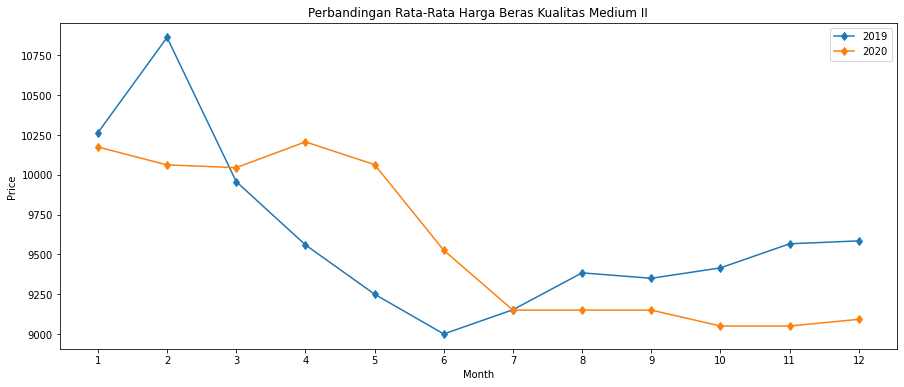

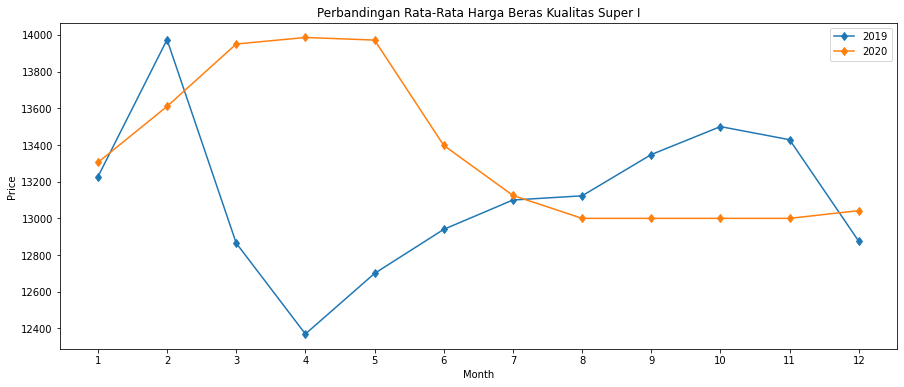

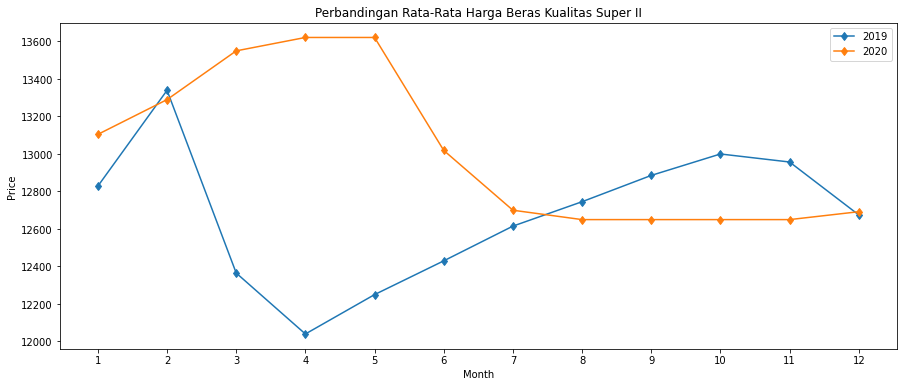

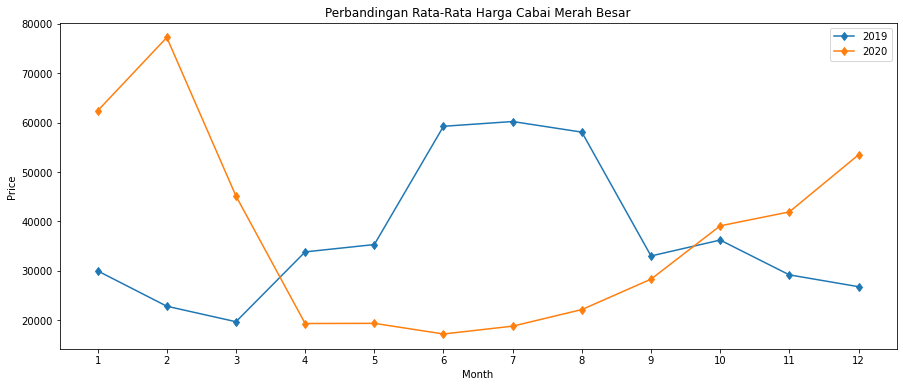

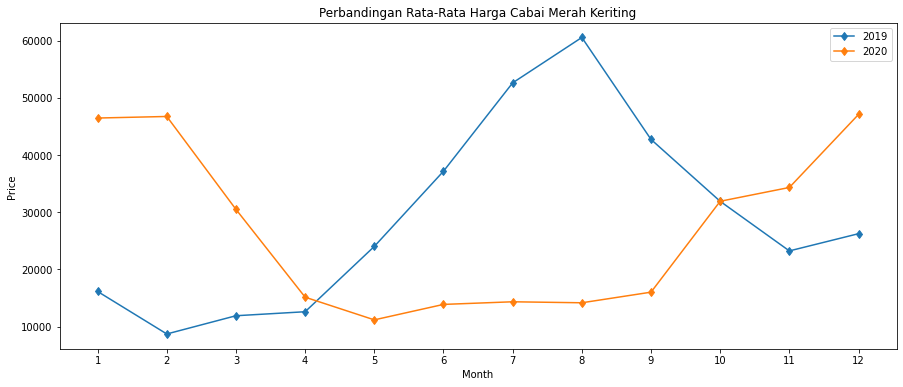

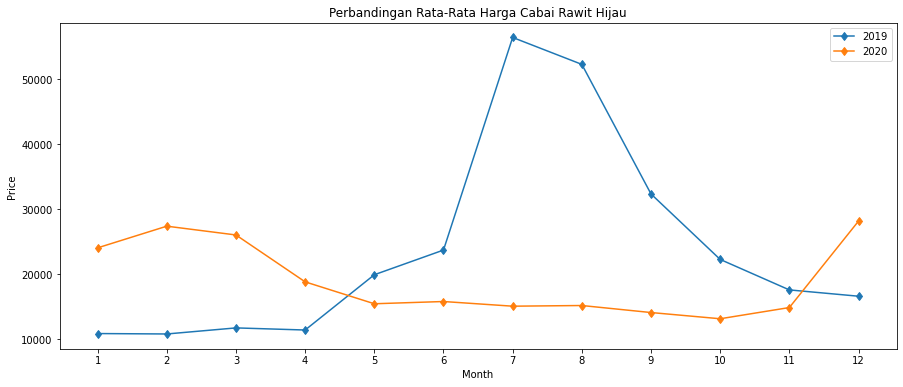

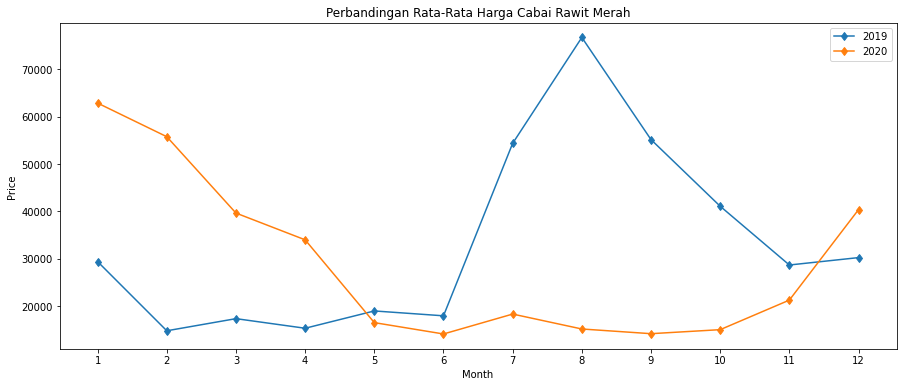

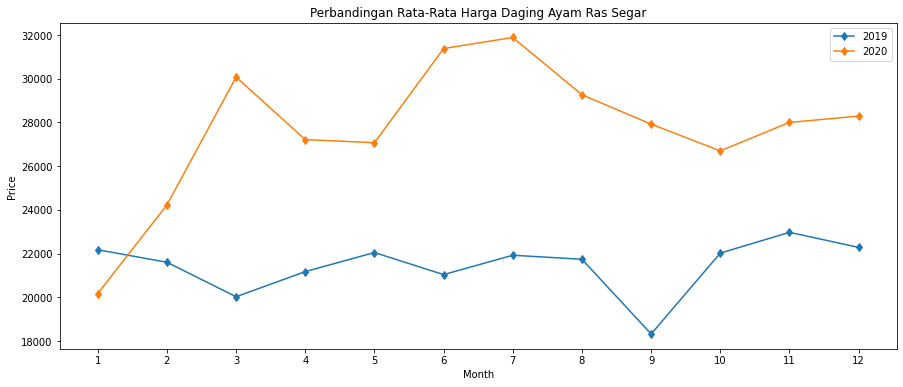

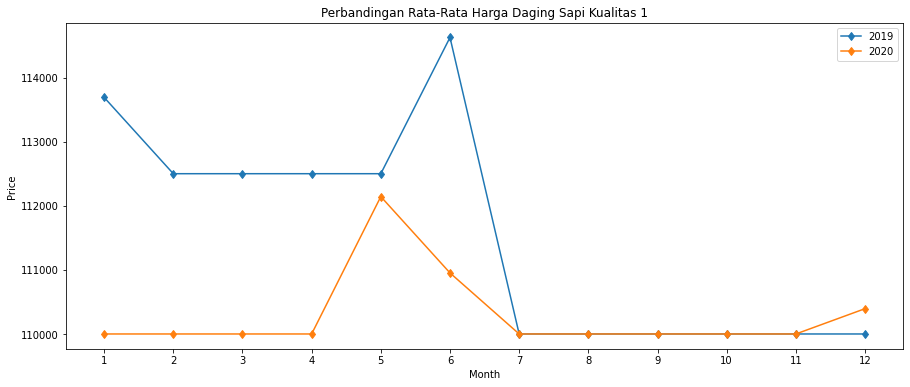

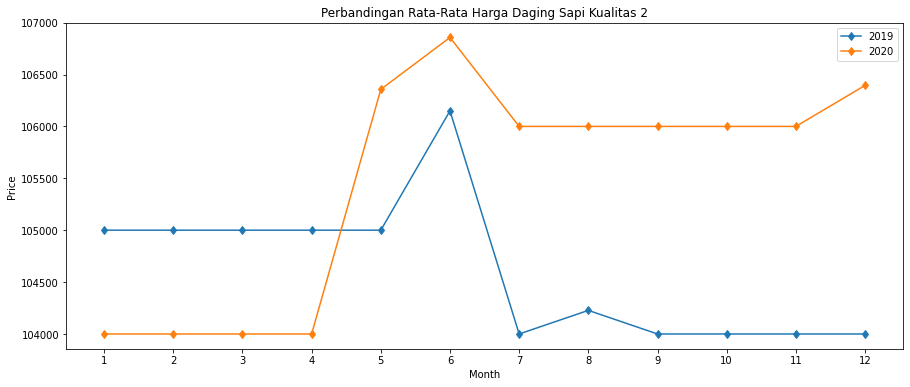

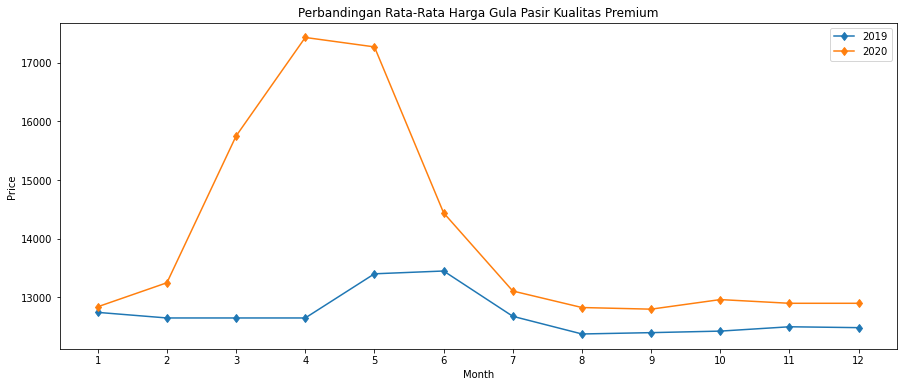

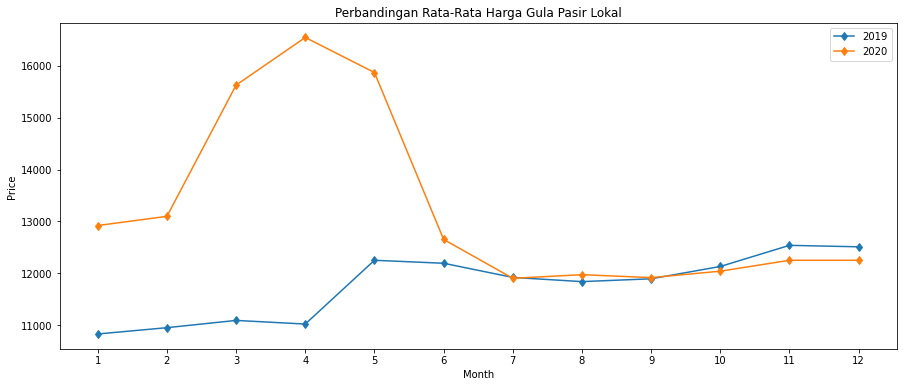

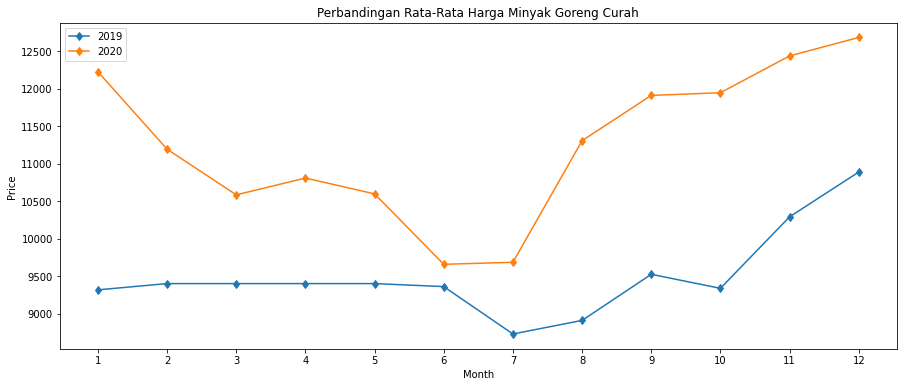

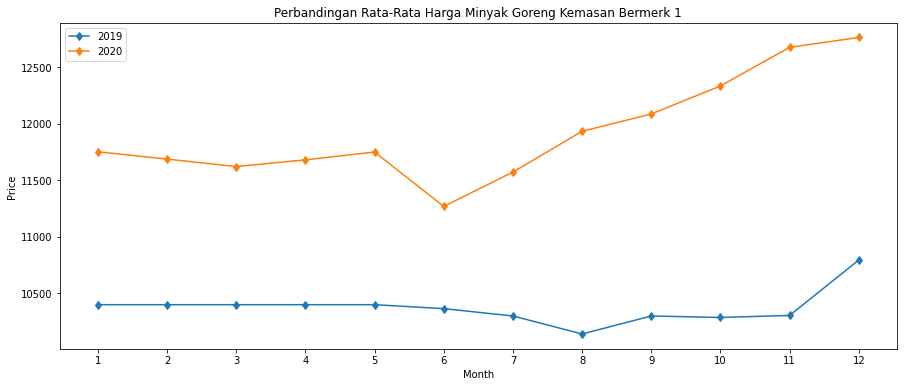

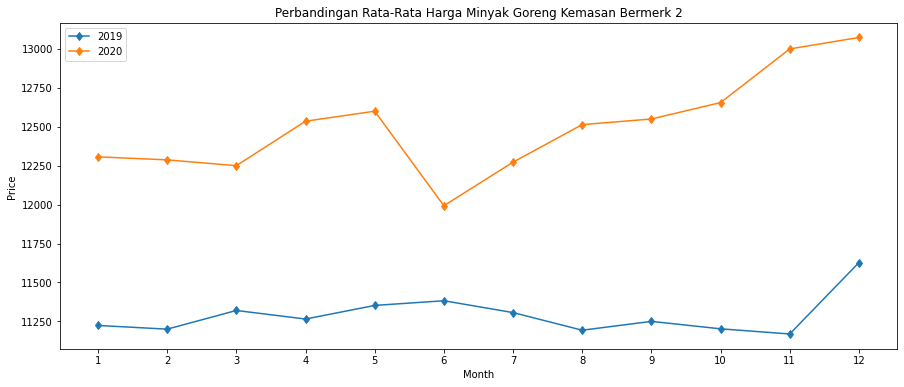

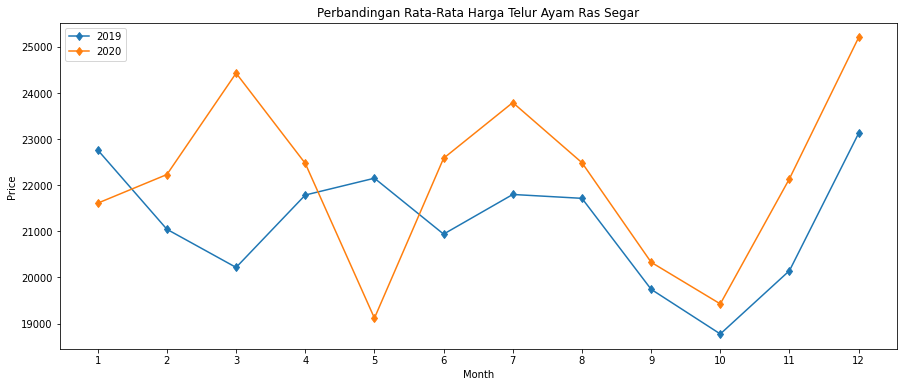

In [ ]:
#Tampilkan visualisasi line chart X = Month, Y= Price untuk Tahun 2019 sebagai Line 1 warna biru
#Tampilkan visualisasi line chart X = Month, Y= Price untuk Tahun 2020 sebagai Line 2 wana oren
for i in Commodity:
  fig, ax = plt.subplots(figsize=(15, 6))
  x_coordinates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
  plt.xlabel("Month")
  plt.ylabel("Price")
  plt.xticks(x_coordinates)
  commodity_2019 = eda_9_2019.loc[eda_9_2019['Commodity'] == i]
  commodity_2020 = eda_10_2020.loc[eda_10_2020['Commodity'] == i]
  y1_coordinates = commodity_2019['Price']
  y2_coordinates = commodity_2020['Price']
  ax.plot(x_coordinates, y1_coordinates, marker='d', label='2019')
  ax.plot(x_coordinates, y2_coordinates, marker='d', label='2020')
  ax.legend(['2019', '2020']);
  plt.title("Perbandingan Rata-Rata Harga "+ i)
plt.show()

### 12. Is there a trend of price changes for all commodities from 2019 to 2020?

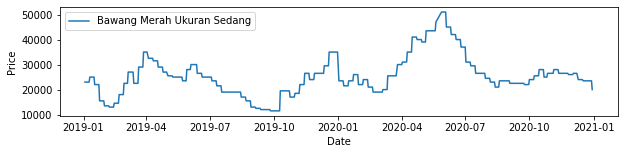

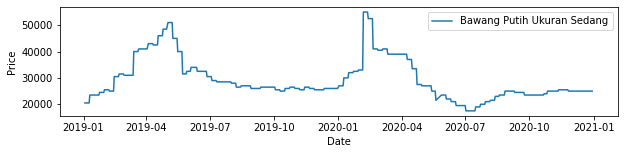

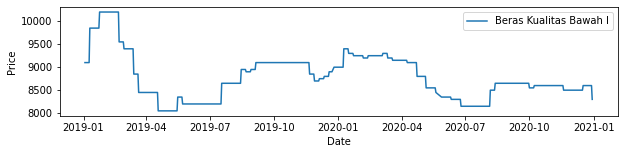

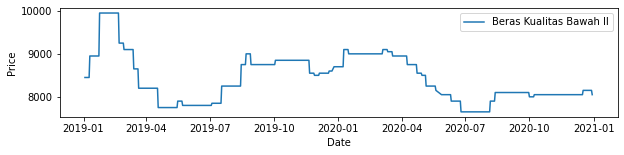

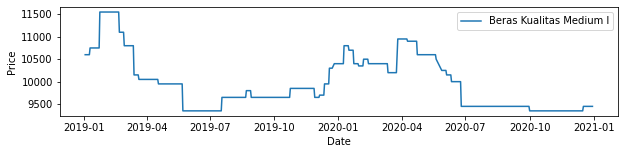

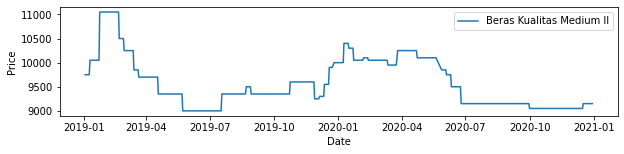

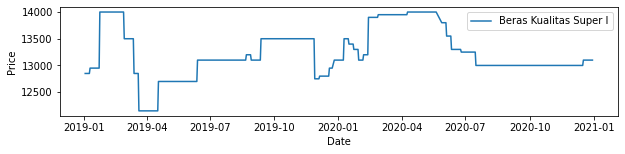

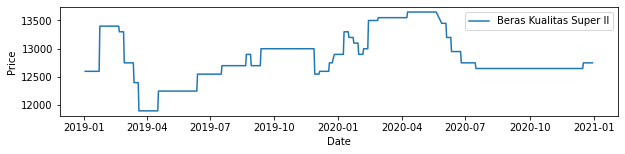

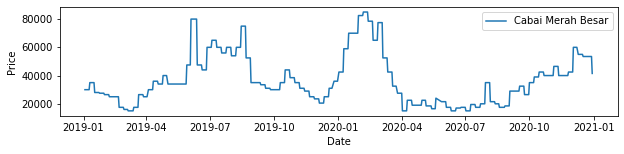

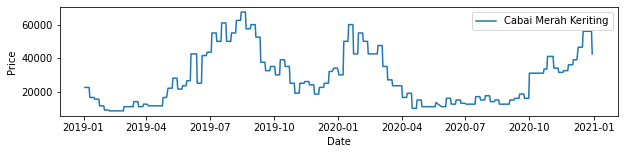

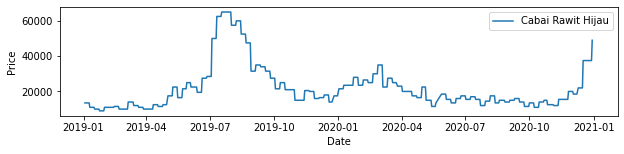

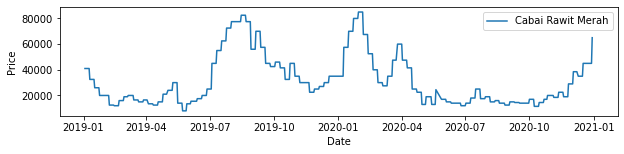

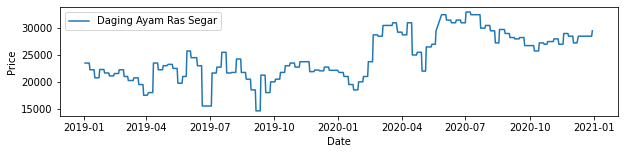

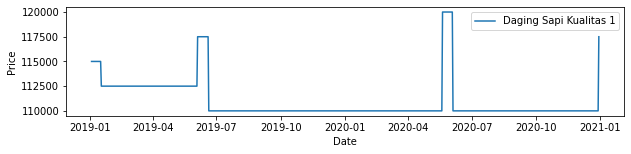

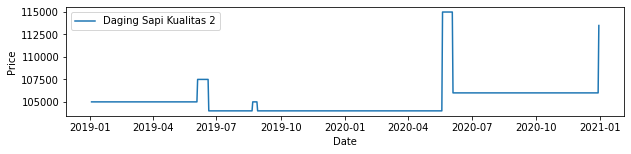

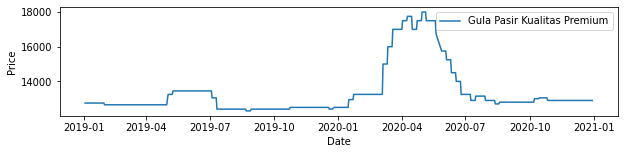

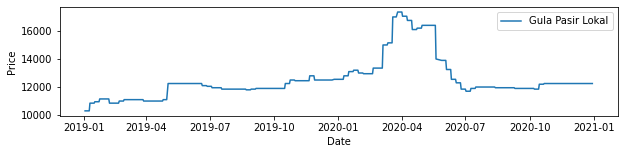

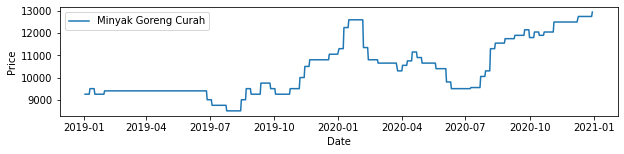

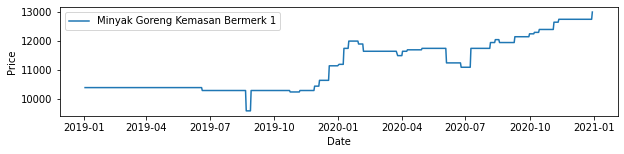

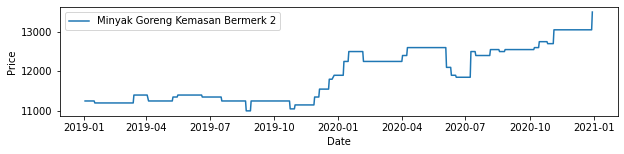

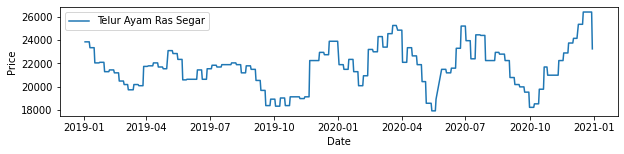

In [ ]:
date = pd.DataFrame(df_sort['Date'].drop_duplicates())  
x_coordinates = [i for i in date['Date']]

for i in Commodity:
  fig, ax = plt.subplots(figsize=(10, 2))
  plt.xlabel("Date")
  plt.ylabel("Price")
  y_coordinates = df_sort.loc[df_sort['Commodity'] == i]['Price']
  ax.plot(x_coordinates, y_coordinates, label=i)
  ax.legend([i])
  plt.show()

# **3.5 Modeling**

### 3.5.1 K-Means

### 3.5.2 Hierarchical